# İstatistik'e Giriş: İstatistiksel Dağılımlar Ders Notlarım

Bir dağılım ile tanımlanması gereken bir veri kümesi üzerinde çalışmaya başladığımızda, elimizdeki ham veriye şu 4 temel soruyu sormalıyız:

* Veri kümesi kategorik verilerden mi yoksa sürekli verilerden mi oluşmaktadır? <br>
* Veriler simetrik mi dağılmıştır? Başka bir deyişle, ortalamının solundaki ve sağındaki değerler eşit veya eşite yakın mıdır? <br>
* Verilerin alabileceği değerlerin üst ya da alt sınırları var mıdır? Örneğin, işsizlik verisinin sıfır değerinin altında bir değer alamayacağı gibi. <br>
* Verinin dağılımına bakıldığında aşırı değerler (outliers) gözlemleniyor mu? <br>

Bu derste istatistiksel analizlerde sıklıkla kullanılan aşağıdaki dağılımları tanıyacağız:

* Normal (Gaussian) Dağılım
* Bernoulli Dağılımı
* Binom Dağılımı
* Tekdüze (Uniform) Dağılım

# 1.1 normal dağılım
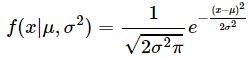

Normal dağılım için **Olasılık Yoğunluk Fonksiyonu** oluşturalım. Bunun için numpy kütüphanesinden **linspace()** fonksiyonu ile **x** değerlerini, ***scipy.stats*** kütüphanesinin **norm** modülündeki ***pdf (probability density function)*** fonksiyonu ile de **y** değerlerini oluşturacağız. <br> Böylece normal dağılım için *Olasılık Yoğunluk Fonksiyonu* oluşturmuş olacağız.

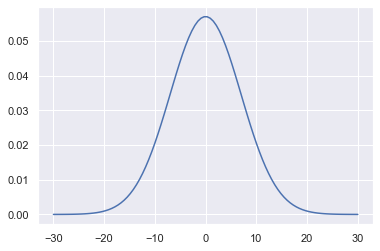

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import seaborn as sns
# Seaborn is a Python data visualization library based on matplotlib.
# It provides a high-level interface for drawing attractive and informative statistical graphics.
sns.set()    # https://seaborn.pydata.org/generated/seaborn.set.html

mu = 0
sigma = 7
x = np.linspace(-30, 30, 100)
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)
plt.show()

Normal dağılmış bir değişkendeki değerlerin yaklaşık %68'i ortalama değerin bir standart sapma kadar üstünde veya altında yer alır. Bu değerlerin % 95'i ortalamanın iki standart sapma ve % 99,7'si ortalamanın üç standart sapma üstünde veya altında olur.
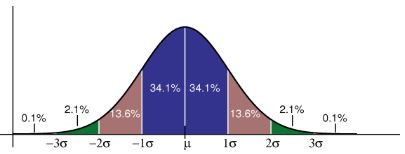

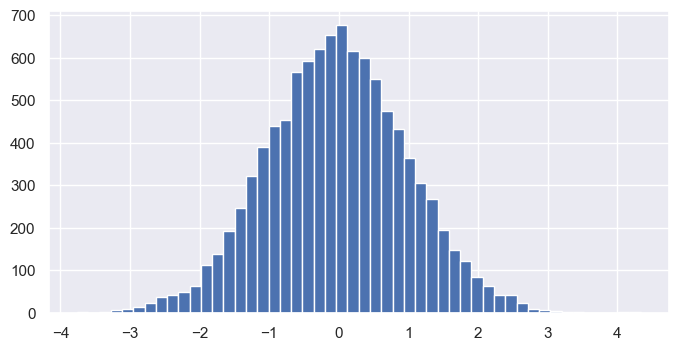

In [4]:
import pandas as pd
mu = 0
sigma = 1
n = 10000

plt.figure(figsize=(8,4), dpi=100)
orneklem = np.random.normal(mu, sigma, n)

plt.hist(orneklem, bins=50)

plt.show()

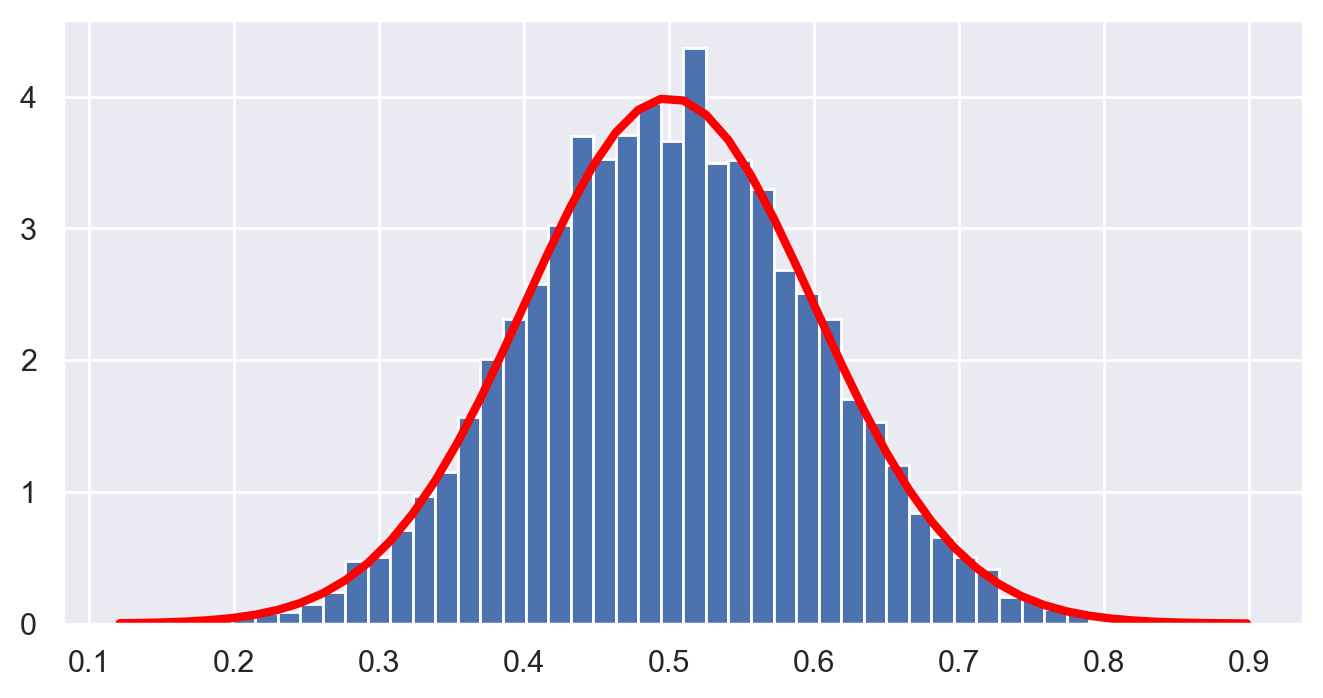

In [5]:
# Şimdi hem histogramı hem de olasılık yoğunluk fonksiyonu ile çizilen çizgi grafiğini birleştirelim.

mu, sigma, n = 0.5, 0.1, 10000
s = np.random.normal(mu, sigma, n)
plt.figure(figsize=(8,4), dpi=200)
counts, bins, ignore = plt.hist(s, 50, density=True)

# counts, plt.hist(s, 50, density=True)[0] değerini, yani ilk elemanını alıyor. y eksenini veriyor. 0~4 arası 50 değerlik bir array
# bins, plt.figure(...)[1] değerini, yani ikinci elemanı alıyor. x ekseni. 0.1~0.9 arası 51 tane değer.
# ignore ise plt.figure(...)[2] değerini, <a list of 50 Patch objects> olan üçüncü elemanı veriyor. işe yaramadığı için "ignore" olarak atanmış olmalı.

formula = 1 / (sigma*np.sqrt(2*np.pi)) * np.exp(-(bins-mu)**2 / (2*sigma**2))
# bins, formuldeki x'e denk geliyor. Dolayısıyla o fonksiyon için her bir 51 değer için tek tek işlem yapıyor.

plt.plot(bins, formula,
         linewidth=3, color="red", linestyle="-")

plt.show()

Normal dağılım veri bilimcileri için çok önemlidir. Çünkü:

* Sadece iki istatistiksel parametre (ortalama (μ) ve standart sapma(σ)) kullanılarak kolayca özetlenebilir.
* Eğri altındaki alan 1'dir, bu da dağılımın içindeki birbirinden ayrı sonuçların olasılığını hesaplamayı kolaylaştırır. (bkz: density=True)
* Psikoloji, finans gibi birçok alanda veriler normale yakın dağılmaktadır.
* Genel olarak, pek çok küçük etkinin sonucunu ölçen herhangi bir değişken tek başına ve bağımsız olarak normal dağılıma yakın olacaktır.
* Yaygın göstergelerin birçoğu (z-skor) ve istatistiksel testler (t-testleri, ANOVA'lar, çan eğrisi) verinin normal dağılımı varsayımı üzerine kurulmuştur. Dolayısıyla, normal dağılımın kullanımı kolaydır ve bu nedenle yaygın olarak kullanılır. μ=1 ve σ=0 olan normal dağılıma, standart normal dağılım denilmektedir

### QQ çizgeleri (Quantile-Quantile plots)

In [6]:
ornek_veri_kumesi_1 = [12,13,19,81,88,90,91,92,146,149,1,3,5,6,
                       11,44,65,79,80,100,112,113,114,120,132,
                       150,180,190,195,55,22,32,35,21,36,45,55]
normal_dagilimli_veri = np.random.normal(np.mean(ornek_veri_kumesi_1),
                                         np.std(ornek_veri_kumesi_1),    ## burada neden ddof=1 yazmadık?
                                         37)
# Örnek veri kümesi ile aynı sayıda elemanı olan normal dağılıma sahip bir veri kümesi oluşturduk.
# Şimdi iki veri kümesini sıralayalım ve grafiğini çizelim.

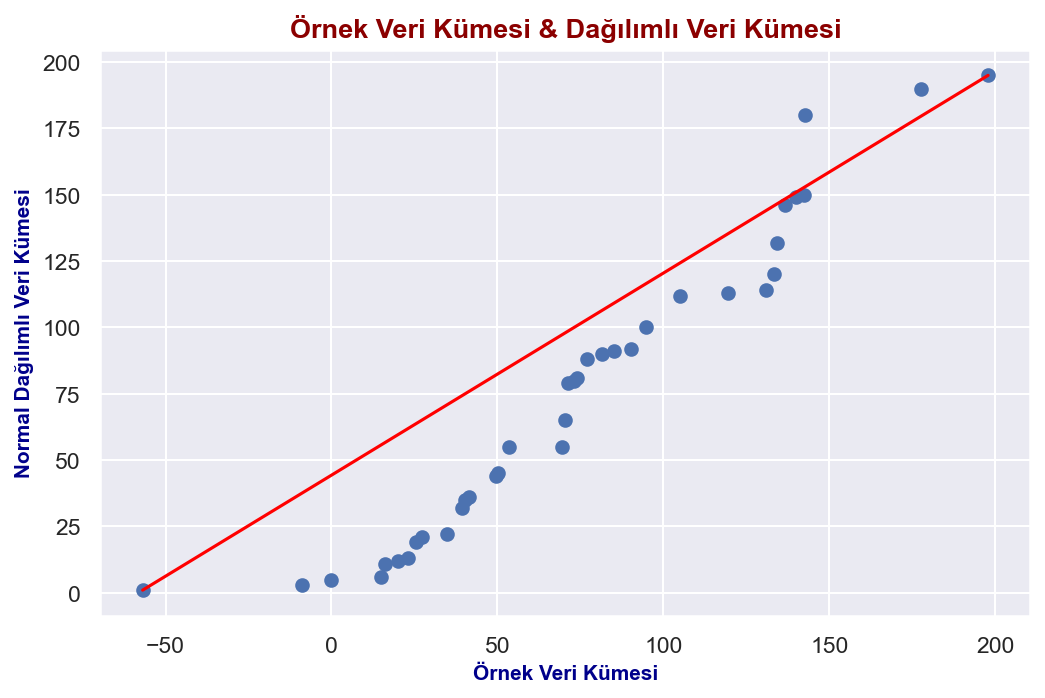

In [7]:
ornek_veri_kumesi_1.sort()
normal_dagilimli_veri.sort()

plt.figure(figsize=(8,5), dpi=150)

baslik_font = {"family":"arial", "color":"darkred", "weight":"bold", "size":13}
eksen_font = {"family":"arial", "color":"darkblue", "weight":"bold", "size":10}

plt.title("Örnek Veri Kümesi & Dağılımlı Veri Kümesi", fontdict=baslik_font)
plt.xlabel("Örnek Veri Kümesi", fontdict=eksen_font)
plt.ylabel("Normal Dağılımlı Veri Kümesi", fontdict=eksen_font)

plt.scatter(normal_dagilimli_veri, ornek_veri_kumesi_1)

plt.plot([np.min(normal_dagilimli_veri), np.max(normal_dagilimli_veri)],
         [np.min(ornek_veri_kumesi_1), np.max(ornek_veri_kumesi_1)],
         c="red")
plt.show()

In [8]:
ornek_veri_kumesi_2 = [120, 122, 118, 126, 122, 126, 120, 114, 125, 
                       117, 114, 113, 119, 113, 118, 124, 127, 127, 
                       122, 120, 119, 130, 117, 121, 116, 107, 117, 
                       131, 125, 125, 127, 113, 115, 121, 111, 115, 121]
ornek_veri_kumesi_2.sort()

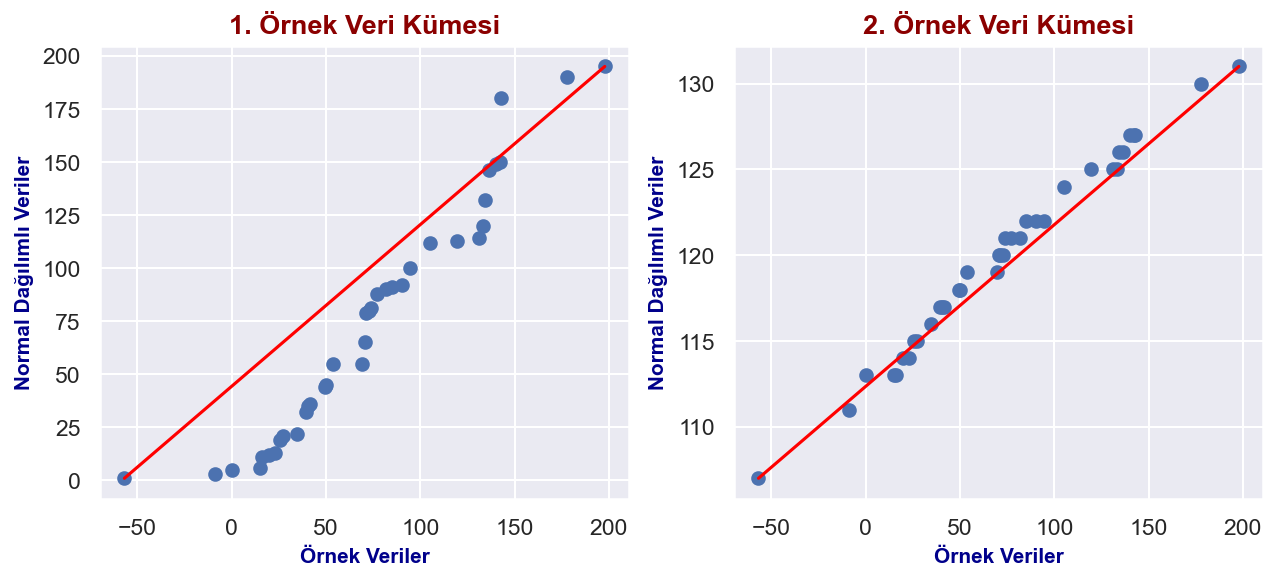

In [9]:
plt.figure(figsize=(10,4), dpi=150)
plt.subplot(121)
plt.title("1. Örnek Veri Kümesi", fontdict=baslik_font)
plt.xlabel("Örnek Veriler", fontdict=eksen_font)
plt.ylabel("Normal Dağılımlı Veriler", fontdict=eksen_font)

plt.scatter(normal_dagilimli_veri, ornek_veri_kumesi_1)
plt.plot([np.min(normal_dagilimli_veri), np.max(normal_dagilimli_veri)],
         [np.min(ornek_veri_kumesi_1), np.max(ornek_veri_kumesi_1)],
         c="red")

plt.subplot(122)
plt.title("2. Örnek Veri Kümesi", fontdict=baslik_font)
plt.xlabel("Örnek Veriler", fontdict=eksen_font)
plt.ylabel("Normal Dağılımlı Veriler", fontdict=eksen_font)
plt.scatter(normal_dagilimli_veri, ornek_veri_kumesi_2)
plt.plot([np.min(normal_dagilimli_veri), np.max(normal_dagilimli_veri)],
         [np.min(ornek_veri_kumesi_2), np.max(ornek_veri_kumesi_2)],
         c="red")

plt.show()

İkinci veri kümesi normal dağılıma daha yakın görünüyor. Çünkü düz çizgiden sapmalar daha az.

Yaptığımız adımlara tekrar bakalım:

* Her değişken için değerler artan sıraya göre sıralanır.
* Sonra her birine karşı bilinen değişken x ekseninde ve bilinmeyen değişken y ekseninde olmak üzere çizilir.
* Eğer bilinmeyen değişken, bilinen değişkenle aynı dağılımı paylaşıyorsa, sonuç sol alt köşeden sağ üst köşeye giden düz bir çizgi olmalıdır.
* Düz çizgiden sapmalar, verilerin dağılıma tam anlamıyla uymadığını gösterir.

Şimdi de Q-Q çizgesi oluşturmak için hazır kütüphaneleri nasıl kullanabileceğimizi görelim. Bunun için scipy kütüphanesinin stats modülünde yer alan probplot() fonksiyonunu kullanacağız.

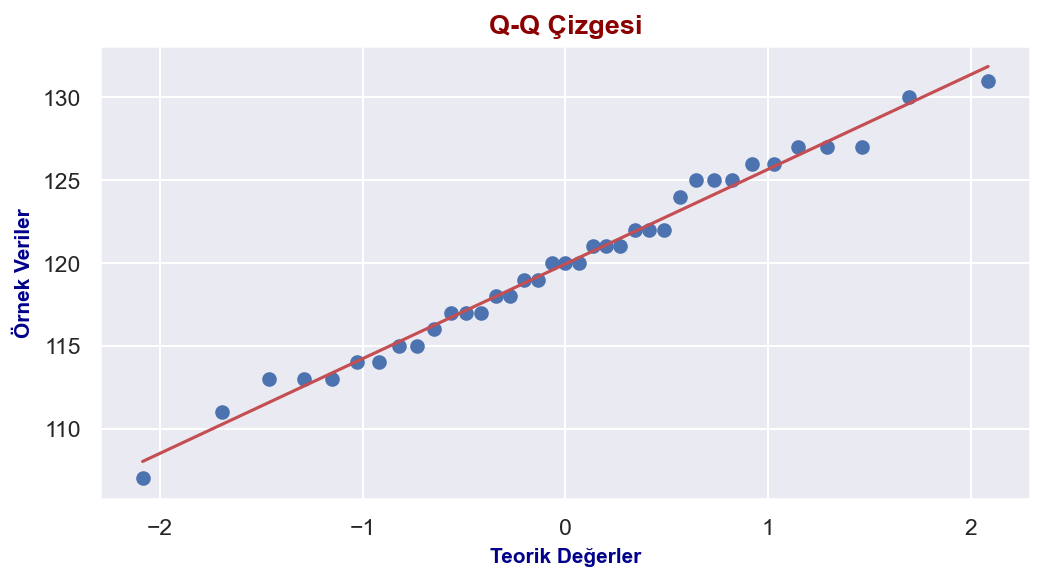

In [10]:
from scipy import stats

plt.figure(figsize=(8,4), dpi=150)

nsample = 100    # örnek veri sayısını böyle önceden yazıyoruz, ilginç bir şekilde.
res = stats.probplot(ornek_veri_kumesi_2, plot=plt)    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

plt.title("Q-Q Çizgesi", fontdict=baslik_font)
plt.xlabel("Teorik Değerler", fontdict=eksen_font)
plt.ylabel("Örnek Veriler", fontdict=eksen_font)

plt.show()

# Alıştırma

In [11]:
n_d = np.random.normal(50, 300, 1000)    # normal dağılımlı
s_n_d = np.random.normal(0, 1, 1000)    # standart normal dağılımlı

n_d.sort()
s_n_d.sort()

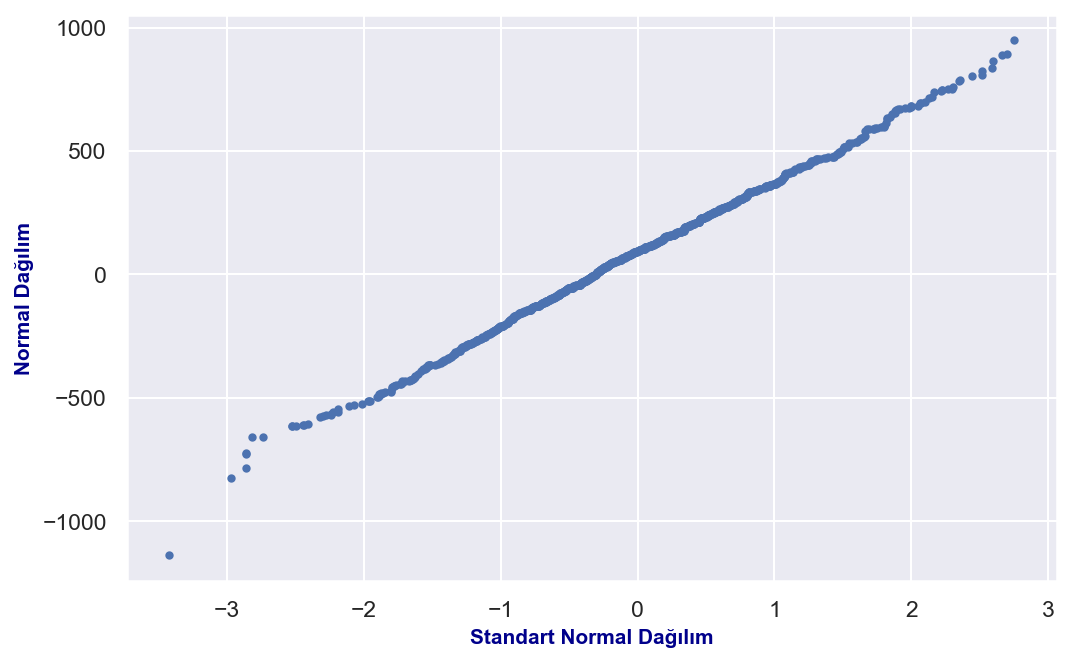

In [12]:
plt.figure(figsize=(8,5), dpi=150)
plt.plot(s_n_d, n_d, "o", markersize=3)
plt.xlabel("Standart Normal Dağılım", fontdict=eksen_font)
plt.ylabel("Normal Dağılım", fontdict=eksen_font)
plt.show()

Q-Q grafiğinde görüldüğü üzere, 45 derecelik bir doğru üzerinde ilerlemekte ancak uç noktalarda sapmalar yer almaktadır. Bu sapmaların ortaya çıkma nedeni ise, iki dağılım arasındaki farklılıklardır.

QQ grafiğine bakıldığında, normal_dagilimli değerlerinin normal olarak dağıldığı açıkça görülmektedir.

Bir QQ çiziminde, bilinen ve bilinmeyen değişkenlerin ölçeklerinin eşleşmek zorunda olmadığını fark edebilirsiniz: Önemli olan her değişken içindeki veri noktaları arasındaki ilişkidir.

***Şimdi siz de normal dağılım dışındaki herhangi bir dağılım kullanarak bu dağılımın nasıl bir dağılım sergilediğini Q-Q grafiği aracılığıyla mentörünüzle tartışınız!*** ##

Şimdi de normal dağılımlı bir veri kümesinin histogramını çizelim ve belirli standart sapma uzaklıklarında dikey çizgiler oluşturalım.

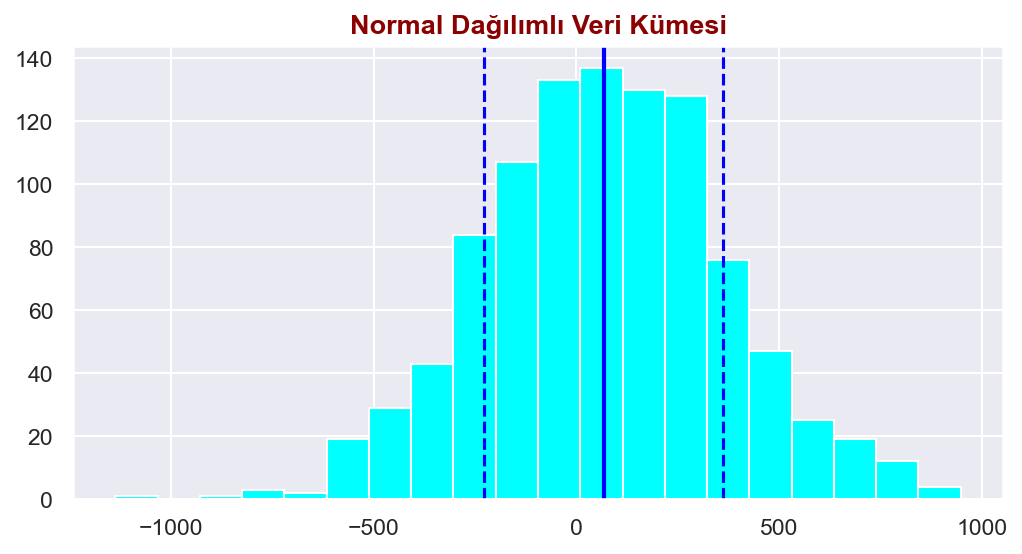

In [13]:
plt.figure(figsize=(8,4), dpi=150)
plt.title("Normal Dağılımlı Veri Kümesi", fontdict=baslik_font)
plt.hist(n_d, bins=20, color="cyan")
plt.axvline(np.mean(n_d), color="blue", linestyle="solid", linewidth=2)
plt.axvline(np.mean(n_d)+np.std(n_d), color="blue", linestyle="dashed", linewidth=1.5)    ## neden ddof=1 yazmadık?
plt.axvline(np.mean(n_d)-np.std(n_d), color="blue", linestyle="dashed", linewidth=1.5)

plt.show()

**"normal_dagilimli"** isimli veri kümesi normal dağıldığı için, ortalama, veri kümelerinin bulunduğu yere yani her iki tarafa düşen verilerin yaklaşık %50’sinin ve ortalamadan bir standart sapma kadar uzak olan verilerin yaklaşık %67’sinin olduğu yere yerleştirilir. Ancak bazı veri kümelerinde ortalama standart sapma ortalamanın her iki tarafında aynı miktarda veriyi kapsamaz. Başka bir deyişle, ortalama merkeze düşmediğinden artık “merkezi” eğilimin bir ölçüsü değildir ve standart sapma orada artık ne kadar varyans olduğunu göstermemektedir. Bu durum çarpıklık **(skew)** olarak olarak tanımlanmaktadır. Aşağıda sağa çarpık ve sola çarpık veri kümelerinin histogramını görüyorsunuz. (bkz: ders imajları)

# 1.2 Diğer dağılımlar

## Bernoulli

Bernoulli dağılımı için olasılık kütle fonksiyonu: <br>
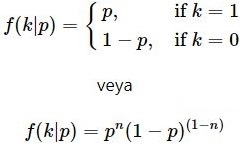<br>
Bernoulli dağılımı, gözlem sayısı 1 olacak şekilde tek bir denemenin yapıldığı Binom dağılımının özel bir durumudur. <br>
Bu nedenle Bernoulli dağılımı tam olarak iki sonucu olan olayları tanımlar.<br>
Bir dağılım kesikli olduğunda (sadece tamsayıları aldığında), o olasılık, olasılık kütle fonksiyonu ile tanımlanır. <br>Sürekli dağılım ise olasılık yoğunluk fonksiyonuna sahiptir. <br>
Bernoulli denemesi yapmak için numpy kütüphanesinin random modülündeki **binomial()** fonksiyonunu kullanabiliriz. <br>Bu fonksiyondaki ilk parametre olan dağılım parametresine (n) 1 değeri vermemiz yeterli olacaktır. <br>
_Bahsedildiği üzere, başarı, başarısızlık veya yazı, tura gibi olasılık üzerinden modelleme yapan Bernoulli dağılımı bize 0 veya 1 olasılığını vermektedir._

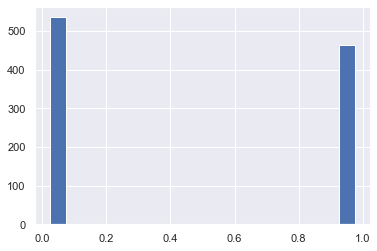

In [14]:
bernoulli = np.random.binomial(1, 0.5, 1000)    # https://docs.scipy.org/doc/numpy-1.9.2/reference/generated/numpy.random.binomial.html
# Draw samples from a binomial distribution.
# Samples are drawn from a Binomial distribution with specified parameters,
# n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1].

plt.hist(bernoulli, rwidth=0.5, align="mid")

plt.show()
# bu grafik bize tam olarak ne anlatıyor?
# Anladığım kadarıyla, Bernoulli dağılımı olduğu için yalnızca 1 ve 0 değerleri var; yazı tura gibi.
# Bu değerlerin 485 tanesi 1, 515 tanesi 0.

## binom dağılımı
(oku:[Wiki](https://en.wikipedia.org/wiki/Binomial_distribution))

Binom dağılımı ile Bernoulli dağılım karıştırılabilmektedir. <br>
Açıklamak gerekirse, bir Bernoulli rasgele değişkeni iki olası sonuca sahiptir: 0 veya 1 <br>
Bir binom dağılımı, bağımsız ve eş _(indenpendent and identically)_ olarak dağıtılmış Bernoulli rasgele değişkenlerinin toplamıdır. <br>Örneğin, bir bozuk para atışı ile elde edilen kazanç Bernoulli rassal _(random)_ değişkenidir. <br>Eğer bu deney 10 kez tekrar edilirse ortaya kazanç 0 ile 10 lira arasında değişmektedir. 10 lira kazanma ihtimali $p^{10}$ dur.

Binom dağılımı, çok kez tekrarlanan ikili bir olay olduğunda (birçok yazı tura atışı gibi) bu olayların başarı sayısını sayar. **p**, etkinliğin **n** tekrarı sırasında **k** sayıda başarı elde etmek olasılığını gösterir.<br>
Olası kütle fonksiyonu (**p**robability **m**ass **f**unction):
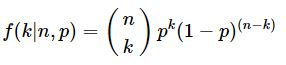 <br>
Binom dağılımı için yazı-tura örneği güzel bir örnektir. Varsayalım ki, 10 kez yazı-tura attıktan sonra farkettik ki, yazı gelme olasılığı 0.4, P(Y)= 0.4, ve tura gelme olasılığı 0.6, P(T)=0.6 olsun. Bu durumda 4 kez tura gelme olasılığı, (cevap=0.111476736)<br>
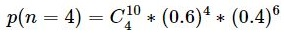 <br>

100 kez tekrar eden 20'sinde başarılı sonuç ortaya çıkarma olasılığı 0.5 olan bir Bernoulli dağılımı oluşturalım. Python'da hazır Bernoulli dağılımı kodu bulunmadığı için binom dağılım kullanarak, Bernoulli dağılımını modellemeye çalışıyoruz:

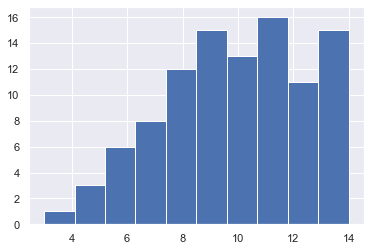

In [15]:
binomial = np.random.binomial(20, 0.5, 100)
plt.hist(binomial)
plt.show()

In [16]:
print( np.array(binomial).reshape(10,10) )

[[ 8 14  8  9 10  8  6 13 10  9]
 [11 13  9  7  5  9  9 10 10  9]
 [14  9  5 11  6  9 13 11 10  7]
 [13  9 11  9  8 12  6 10  7 11]
 [ 6 12 14 11  7 10 11 10  9 14]
 [13  8 13 14 11 12  8  7  7  9]
 [13 12 11 13  8 12  6 12 10  8]
 [13  7 11  8  3 12 11  7 12  8]
 [ 9 11 10 13 10  8 10  5 12 11]
 [11  9 12 10  8  9  6 12 11 11]]


Şimdi de scipy kütüphanesinin stats modülündeki binom fonksiyonu ile farklı tekrar sayılarında ve olasılık değerlerinde denemeler yapalım. Bu fonksiyon bize bir **rv_frozen** tipinde bir dağılım nesnesi döndürmektedir. Bu nesne değişkeni ile birçok işlem yapabiliriz. Biz burada 1 ila 40 arasındaki değerleri olan x değerleri için **pmf()** (olasılık yoğunluk fonksiyonunu) aracılığıyla y değerleri oluşturacak ve fonksiyonu çizeceğiz.

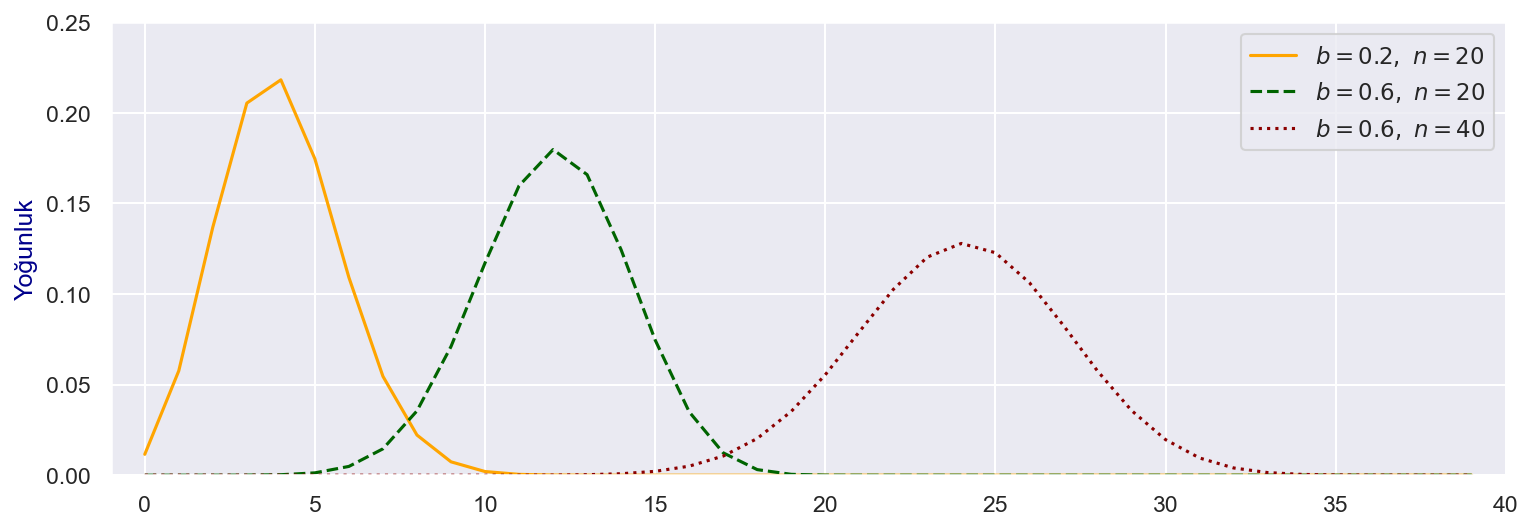

In [17]:
from scipy.stats import binom
# import warnings
# warnings.filterwarnings("ignore")

tekrar_sayisi = [20, 20, 40]
olasilik_degerleri = [0.2, 0.6, 0.6]
cizgi_sekli = ["-", "--", ":"]
renk = ["orange", "darkgreen", "darkred"]

x = np.arange(0, 40)

fig, ax = plt.subplots(figsize=(12,4), dpi=150)    ## bunu böyle iki değere vermemizin nedeni nedir?
# çıktı: (<Figure size 1200x400 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot at 0x226559b1ee0>)

for (n, b, ls, r) in zip(tekrar_sayisi, olasilik_degerleri, cizgi_sekli, renk):
    dist = binom(n, b) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
    # dist --->  <scipy.stats._distn_infrastructure.rv_frozen at 0x22655c6d160>
    y = dist.pmf(x)    # yukarıdaki link'te yazıyor açıklamalar
    plt.plot(x, y, linestyle=ls, color=r, label=r"$b=%.1f, \ n=%i$" % (b, n))    ## regex?
    # ls veya linestyle. ikisi de olur
    
plt.xlim(-1, 40)
plt.ylim(0, 0.25)

plt.ylabel("Yoğunluk", c="darkblue")

plt.legend()    # .plot() içindeki label'ler, lejant için
plt.show()    ## bu grafikleri birlikte yorumlayabilir miyiz?

## tekdüze (uniform) dağılım

Tekdüze dağılım, belirli bir aralıktaki her değerin eşit olarak gerçekleşme ihtimali olan ve aralık dışındaki değerlerin hiçbir zaman gerçekleşme ihtimalinin olmadığı bir olasılıktır. Eğrinin altındaki alanın 1'e eşit olması gerektiğinden, aralığın uzunluğu, eğrinin yüksekliğini belirler. Aşağıdaki şekilde, aralıktaki eşit dağılımını görebilirsiniz. (a, b). Alanın 1 olması gerektiğine dikkat edin. Tekdüze bir dağılımın yoğunluk grafiğini yaparsak, düz görünür çünkü hiçbir değer diğerinden daha olası değildir (ve dolayısıyla daha fazla yoğunluğa sahiptir).
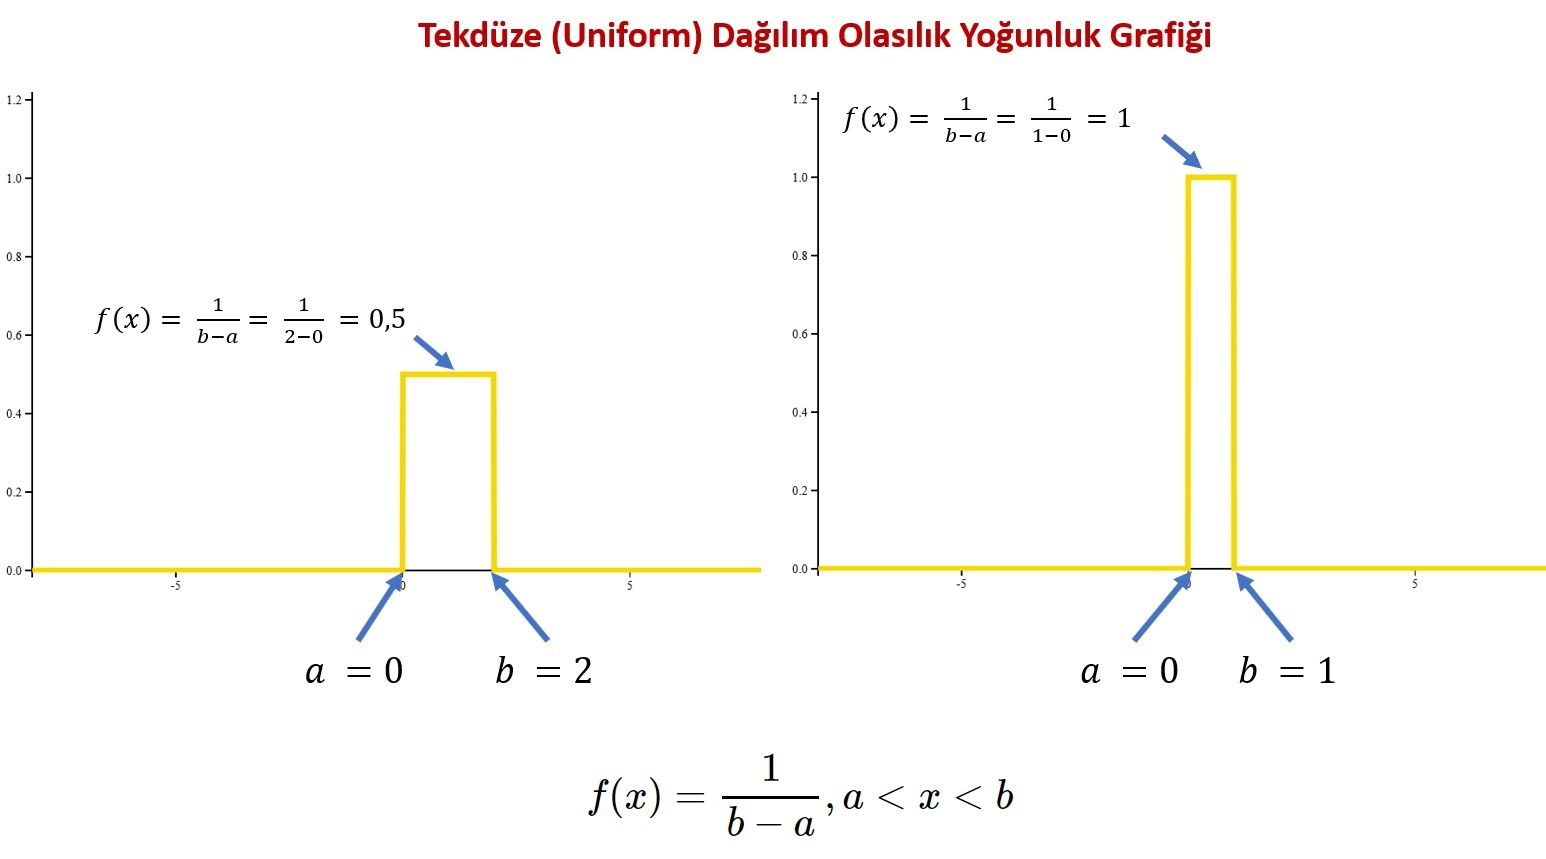

# Alıştırma
Şimdi python ile tekdüze dağılıma sahip bir veri kümesi oluşturup histogramını ve yoğunluk fonksiyonunu çizelim. Veri kümesi oluşturmak için **scipy** kütüphanesinin stats modülündeki **uniform()** fonksiyonunu kullanacağız.

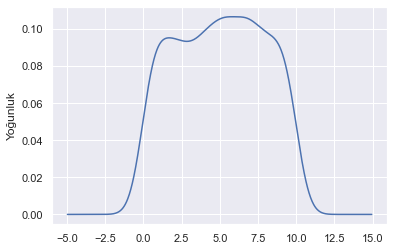

In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
from scipy.stats import uniform    # binom, norm   da import edildi

uniform_data = stats.uniform.rvs(size = 1000,    # 1000 sayı üretelim.
                                 loc = 0,        # 0'dan başlasın.
                                 scale = 10)     # Ölçek 10 olsun.
# rvs: Generate random numbers
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

df = pd.DataFrame(uniform_data)
df.plot(kind="density", legend=False)    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
plt.ylabel("Yoğunluk")
plt.show()

In [19]:
print("max:", max(uniform_data))
print("min:", min(uniform_data))

max: 9.966282975197938
min: 0.011536787098932466


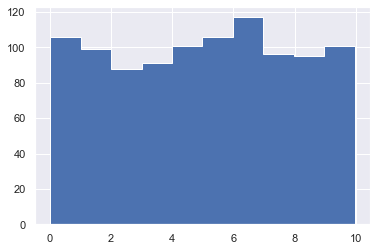

In [20]:
plt.hist(uniform_data, histtype="stepfilled")
plt.show()

<u>Son olarak bu derste gördüğümüz dağılımlara sahip veri kümeleri oluşturmayı tekrar hatırlayalım: <br> </u>

* p başarı olasılığı ile 100 satır ve 1 sütunluk Bernoulli dağılıma sahip rassal sayı üretimi:<br>
**np.random.binomial(1,p,(100,10))**


* 100'e 10'luk Binom dağılıma sahip veri üretimi:<br>
**np.random.binomial(n,p,(100,10))**<br>


* Belirli bir ortalama ve varyansa sahip 1000 satır ve 1 sütunluk normal dağılıma sahip veri üretimi:<br>
**np.random.normal(mu, sigma, (1000,1))**<br>


* Belirli bir alt ve üst sınıra sahip 1'e 1'lik tekdüze dağılımdan veri üretimi:<br>
**np.random.uniform(low, high, (1,1))**<br>

***

# <font color=green text-align=center>"Dağılımlar" ders notları:

## <font color=red>Bernoulli ve Binom Dağılımları Arasındaki Fark

Bernoulli dağılımı ile Binom dağılımı arasındaki temel fark **deney sayısıdır**.
- Bernoulli dağılımında, olay bir kez olur. Tek bir olayın başarı ihtimalinden bahsedilir. Kazanma ve kaybetme olarak iki ihtimal vardır.
        - Yazı-tura oyununda yazı için bahis yapıldığında tura gelme olasılığı (Kazanma ihtimali 1/2), 
        - Zar oyununda 6 için bahis yapıldığında kazanma veya kaybetme olasılığı (Kazanma ihtimali 1/6),
        - İçinde 3 mavi, 5 yeşil, 6 kırmızı bilye olan torbadan bilye çekildiğinde mavi gelince kazanıldığında, kazanma  
        olasılığı (Kazanma ihtimali 3/14).
- Binom dağılımı, Bernoulli dağılımındaki belirtilen olayların *`n`* sayıda deneme yapılması durumunda, istenen olayın gerçekleşme durumu ile ilgilenir. Olaylar birbirinden bağımsız olmalıdır.
        - Para 5 kez atıldığında 3 kez tura gelme olasılığı,
        - Zar 10 kez atıldığında 4 kez kazanma (6 gelmesi) olasılığı,
        - Bilye çekme olayı (birbirinden bağımsız olması için yerine konmalı) 3 kez tekrarlandığında 2 kez kazanma
        olasığı.

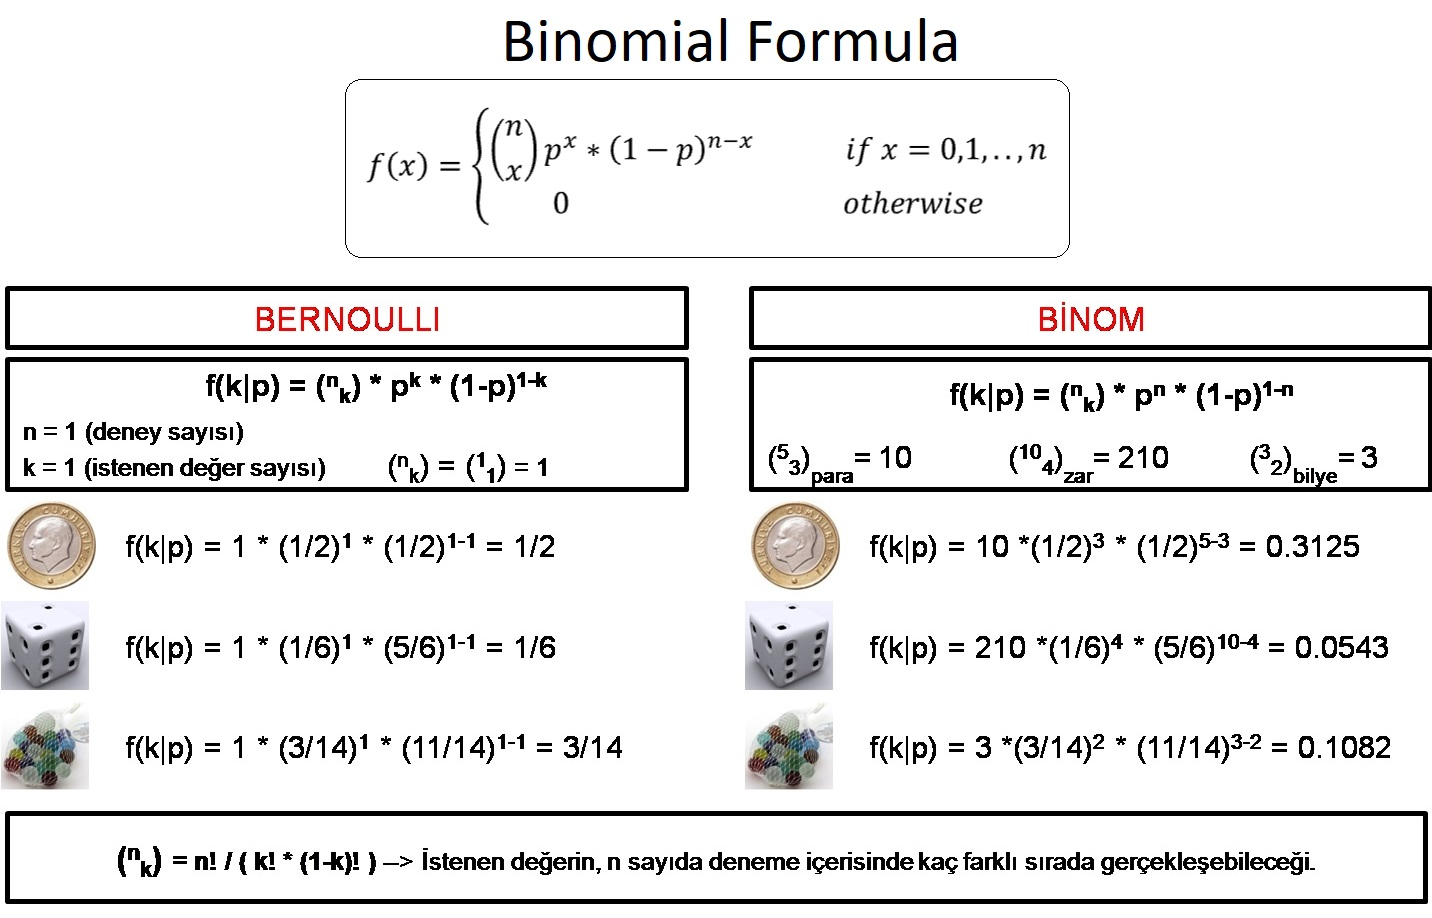

#### Örnek dağılım aşağıdaki gibi olabilir.

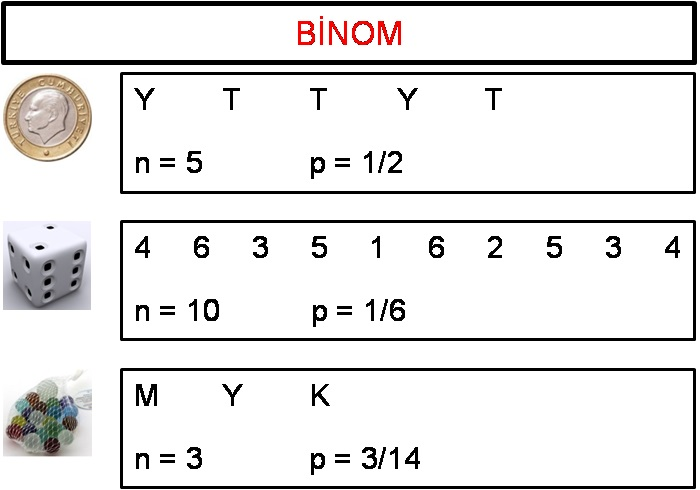

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom, uniform

In [22]:
para=np.random.binomial(5, 1/2) # Oyunda para 5 kez atılıyor, istediğimiz tarafın gelme olasılığı 1/2
zar=np.random.binomial(10, 1/6) # Oyunda zar 10 kez atılıyor, istediğimiz yüzün gelme olasılığı 1/6
bilye=np.random.binomial(3, 3/14) # Oyunda bilye 3 kez çekiliyor, mavi rengin gelme olasılığı 3/14

In [23]:
print(para, "kere tura geldi.") # Para atışlarının sonucunda kaç tanesinin tura geldiği
print(zar, "kere 6 geldi.") # Zar atışları sonucunda kaç tanesinin 6 geldiği
print(bilye, "bilye mavi geldi.") # Bilye çekimi bittiğinde kaç tanesinin mavi geldiği

3 kere tura geldi.
2 kere 6 geldi.
0 bilye mavi geldi.


#### Şimdi, bu oyunların her birini 8'er kez oynamış olalım.

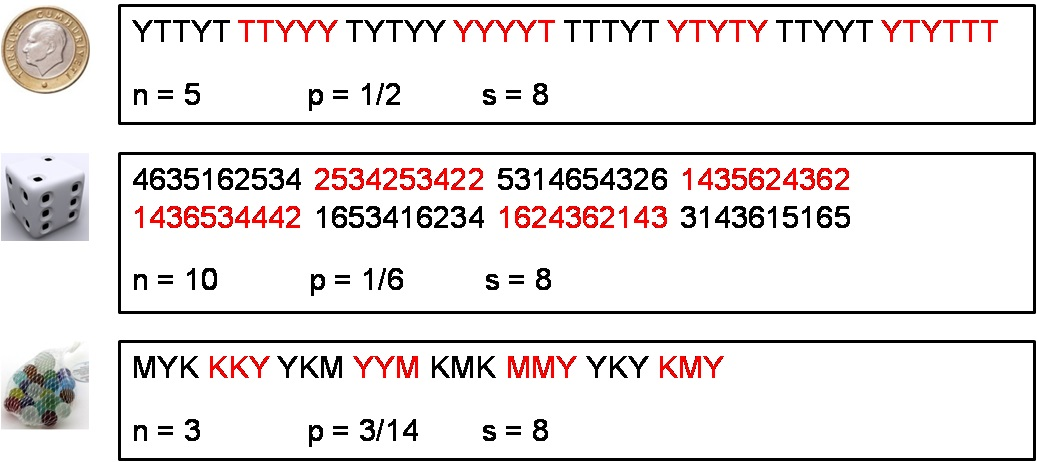

#### Yukarıdaki durumu kodlarsak:

In [24]:
np.random.seed(244)
para_8 = np.random.binomial(5, 1/2, 8)   # Oyun 8 kez tekrarlanıyor
zar_8 = np.random.binomial(10, 1/6, 8)   # Oyun 8 kez tekrarlanıyor
bilye_8 = np.random.binomial(3, 3/14, 8) # Oyun 8 kez tekrarlanıyor

In [25]:
print(para_8)  # 8 oyun sonucunda, her bir oyunda kaç tanesinin tura geldiği
print(zar_8)   # 8 oyun sonucunda, her bir oyunda kaç tanesinin 6 geldiği
print(bilye_8) # 8 oyun sonucunda, her bir oyunda kaç tanesinin mavi geldiği

[2 1 2 2 1 2 5 3]
[2 2 2 0 1 0 1 3]
[0 1 1 0 3 0 0 1]


#### Grafikler:

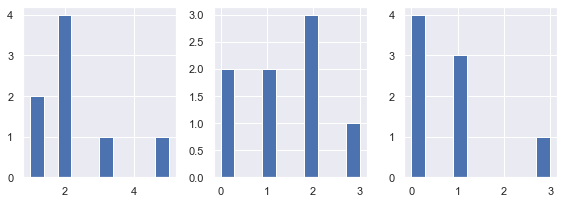

In [26]:
plt.figure(figsize=(8,3))

plt.subplot(131)
plt.hist(para_8) # para

plt.subplot(132)
plt.hist(zar_8) # zar

plt.subplot(133)
plt.hist(bilye_8) # bilye

plt.tight_layout()
plt.show()
# grafikleri daha iyi anlamak için, para grafiğini yorumlayalım:
# 2 adet "5 kere attığımızda 1 kere tura gelmiş",
# 4 adet "5 kere attığımızda 2 kere tura gelmiş",
# 1 adet "5 kere attığımızda 3 kere tura gelmiş",
# 0 adet "5 kere attığımızda 4 kere tura gelmiş",
# 1 adet "5 kere attığımızda 5 kere tura gelmiş".

### Probability Mass Function - Olasılık Kütle Fonksiyonu

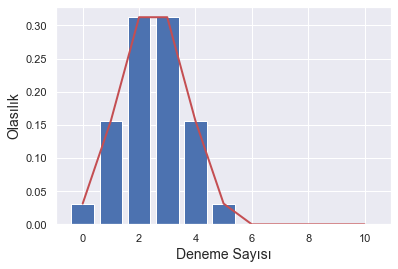

10 deneme sonucunda, istenenen olayın (5 atımda x kere tura gelme);

0 kez tura gelme olasılığı: % 3.125
1 kez tura gelme olasılığı: % 15.625
2 kez tura gelme olasılığı: % 31.250
3 kez tura gelme olasılığı: % 31.250
4 kez tura gelme olasılığı: % 15.625
5 kez tura gelme olasılığı: % 3.125
6 kez tura gelme olasılığı: % 0.000
7 kez tura gelme olasılığı: % 0.000
8 kez tura gelme olasılığı: % 0.000
9 kez tura gelme olasılığı: % 0.000
10 kez tura gelme olasılığı: % 0.000


In [27]:
# Para atışı için PMF

a=5   # Deneme sayısı
b=1/2 # Her bir durum için olasılık değeri
x=np.arange(0,11) # Deneme sayı listesi (x ekseninde yazdırmak için)

dist = binom(a,b) # Belirtilen parametrelere göre dağılım oluşturma
y = dist.pmf(x)   # Her deneme sayısına göre gerçekleşme olasılıkları

plt.bar(x, y)
plt.plot(x, y, c="r", lw=2)
plt.xlabel("Deneme Sayısı", fontsize=14)
plt.ylabel("Olasılık", fontsize=14)
plt.show()

print("{} deneme sonucunda, istenenen olayın (5 atımda x kere tura gelme);\n".format(np.max(x)))
for sayi, olasilik in zip(x, y):
    print("{} kez tura gelme olasılığı: % {:.3f}".format(sayi, olasilik*100))

3 kez gerçekleşme ihtimali yukarıdaki resimde hesaplanan olasılık değeri kadar.

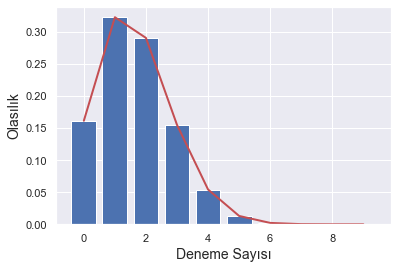

9 deneme sonucunda, istenenen olayın (10 atımda x kere 6 gelme);

0 kez 6 gelme olasılığı: % 16.15056
1 kez 6 gelme olasılığı: % 32.30112
2 kez 6 gelme olasılığı: % 29.07100
3 kez 6 gelme olasılığı: % 15.50454
4 kez 6 gelme olasılığı: % 5.42659
5 kez 6 gelme olasılığı: % 1.30238
6 kez 6 gelme olasılığı: % 0.21706
7 kez 6 gelme olasılığı: % 0.02481
8 kez 6 gelme olasılığı: % 0.00186
9 kez 6 gelme olasılığı: % 0.00008


In [28]:
# Zar atışı için PMF

a=10  # Deneme sayısı
b=1/6 # Her bir durum için olasılık değeri
x = np.arange(0,10) 

dist = binom(a,b) # Belirtilen parametrelere göre dağılım oluşturma
y = dist.pmf(x)   # Her deneme sayısına göre gerçekleşme olasılıkları

plt.bar(x, y)
plt.plot(x, y, c="r", lw=2)
plt.xlabel("Deneme Sayısı", fontsize=14)
plt.ylabel("Olasılık", fontsize=14)
plt.show()

print("{} deneme sonucunda, istenenen olayın (10 atımda x kere 6 gelme);\n".format(np.max(x)))
for sayi, olasilik in zip(x, y):
    print("{} kez 6 gelme olasılığı: % {:.5f}".format(sayi, olasilik*100))

4 kez gerçekleşme ihtimali yukarıdaki resimde hesaplanan olasılık değeri kadar.

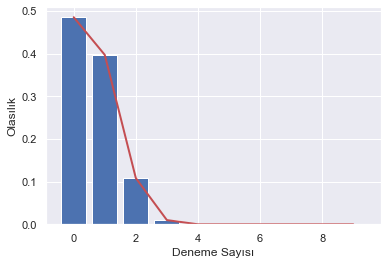

9 deneme sonucunda, istenenen olayın;

0 kez gerçekleşme olasılığı: % 48.51
1 kez gerçekleşme olasılığı: % 39.69
2 kez gerçekleşme olasılığı: % 10.82
3 kez gerçekleşme olasılığı: % 0.98
4 kez gerçekleşme olasılığı: % 0.00
5 kez gerçekleşme olasılığı: % 0.00
6 kez gerçekleşme olasılığı: % 0.00
7 kez gerçekleşme olasılığı: % 0.00
8 kez gerçekleşme olasılığı: % 0.00
9 kez gerçekleşme olasılığı: % 0.00


In [29]:
# Bilye çekilişi için PMF

a=3    # Deneme sayısı
b=3/14 # Her bir durum için olasılık değeri
x=np.arange(0,10) 

dist=binom(a,b) # Belirtilen parametrelere göre dağılım oluşturma
y=dist.pmf(x)   # Her deneme sayısına göre gerçekleşme olasılıkları

plt.bar(x, y)
plt.plot(x, y, c="r", lw=2)
plt.xlabel("Deneme Sayısı")
plt.ylabel("Olasılık")
plt.show()

print("{} deneme sonucunda, istenenen olayın;\n".format(np.max(x)))
for sayi, olasilik in zip(x, y):
    print("{} kez gerçekleşme olasılığı: % {:.2f}".format(sayi, olasilik*100))

2 kez gerçekleşme ihtimali yukarıdaki resimde hesaplanan olasılık değeri kadar.

## <font color=red>Uniform Dağılım

Rasgele bir değişkenin belirli bir aralıkta gerçekleşme ihtimaller toplamı 1, hepsi eşit ve belirtilenin haricinde başka bir sonuç olma olasılığı 0 ise **uniform dağılım** denir. Sadece kesikli değişkenler için uniform dağılımdan bahsedilebilir.

Mesela;
- Para atışında yazı ve tura gelme ihtimali eşit ve toplamı 1, başka bir şey gelme ihtimali yok, (Uniform)


- Zar atışında 1,2,3,4,5,6 gelme ihtimali eşit ve toplamı 1, başka bir şey gelme ihtimali yok, (Uniform)


- Bilye çekerken mavi, yeşil ve kırmızı ihtimalleri eşit değil. (Uniform değil)

#### Para atışı için uniform dağılım grafiği

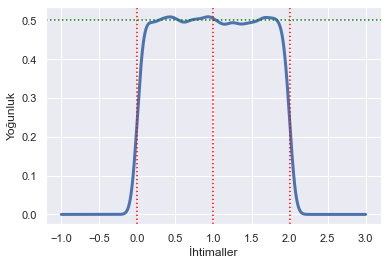

In [30]:
para_uni = uniform.rvs( size=50000, # 50.000 tane sayı
                    loc = 0,    # İhtimaller 0 ve 1 olduğu için 0'dan başlıyor 
                    scale=2)    # 2 farklı ihtimal var
## burayı tam oturtamadım kafamda. birlikte yorumlayabilir miyiz? scale=1 olması gerekmiyor mu?

df = pd.DataFrame(para_uni)
df.plot(kind="density", lw=3, legend=False)

plt.ylabel('Yoğunluk')
plt.xlabel('İhtimaller')

plt.axvline(0, color="red", ls=":")
plt.axvline(1, color="red", ls=":")
plt.axvline(2, color="red", ls=":")
plt.axhline(1/2, color="green", ls=":") # Her durumun gerçekleşme olasılığı

plt.show()

- Yazı gelme ihtimalinin (0-1 arası) gerçekleşme olasılığı 0.5 (yoğunluk ekseni),

- Tura gelme ihtimalinin (1-2 arası) gerçekleşme olasılığı 0.5

#### Zar atışı için uniform dağılım grafiği

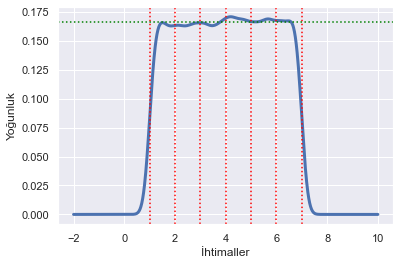

In [31]:
zar = uniform.rvs(  size=50000, # 50.000 tane sayı
                    loc = 1,    # İhtimaller 1 ve 6 olduğu için 1'den başlıyor 
                    scale=6)    # 6 farklı ihtimal var

df = pd.DataFrame(zar)
df.plot(kind="density", lw=3, legend=False)

plt.ylabel('Yoğunluk')
plt.xlabel('İhtimaller')

plt.axvline(1, color="red", ls=":")
plt.axvline(2, color="red", ls=":")
plt.axvline(3, color="red", ls=":")
plt.axvline(4, color="red", ls=":")
plt.axvline(5, color="red", ls=":")
plt.axvline(6, color="red", ls=":")
plt.axvline(7, color="red", ls=":")
plt.axhline(1/6, color="green", ls=":") # Her durumun gerçekleşme olasılığı

plt.show()

Her bir olayın gerçekleşme ihtimali (1-2 arası olma, 2-3 arası olma, ....) 1/6 = 0.167